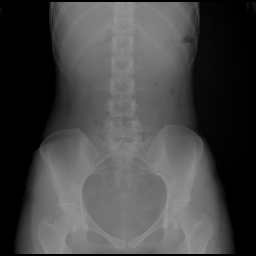

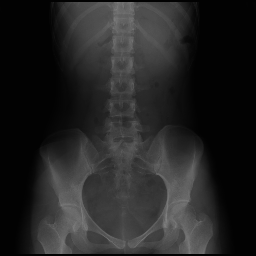

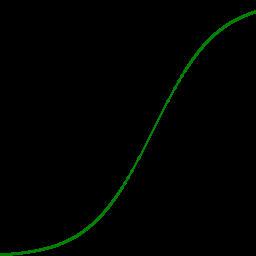

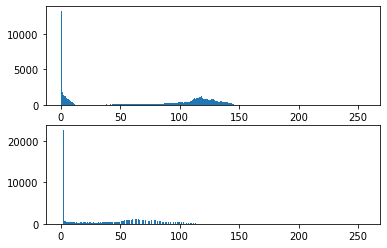

In [15]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

# LUT 생성 함수
def sigmoid_transform(a,c,LUT):
    i=0
    for i in range(0,256):
      s = i/255.0
      x = math.exp(-a*(s-c))
      tmp=255.0*(1.0/(1+x))
      if tmp>255 :
         tmp=255
      LUT[i]=tmp

# 그래프 생성
def view_1d(mat,size,data,DX,DY,yscale):
    cv2.rectangle(mat, (0,0), (256,256), (0,0,0), -1)
    i=0
    for i in range(0,size-1):
        cv2.line(mat,(DX+i,DY-yscale*data[i]),(DX+i+1,DY-yscale*data[i+1]),(0,128,0),2)

# 2차원 컬러 이미지 생성
view = np.zeros((256,256,3),np.uint8) 
LUT = np.zeros(256,np.uint8)

a = 8
c = 0.6
sigmoid_transform(a, c, LUT)
view_1d(view, 256, LUT, 0, 256, 1)

img = cv2.imread('/content/drive/MyDrive/python/data/의료영상데이타/abdomen SUPINE sens-197 highdose.bmp', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(img,(256,256), cv2.INTER_AREA)
dst = image.copy()

w = image.shape[1]
h = image.shape[0]

for i in range(0,h):
  for j in range(0,w): #power transform 대신에 sigmoid transform 프로그램이 필요.
    dst[i][j] = LUT[image[i][j]]

plt.subplot(211)
plt.hist(image.ravel(), 256, [0,256])
plt.subplot(212)
plt.hist(dst.ravel(), 256, [0,256])

cv2_imshow(image)
cv2_imshow(dst)
cv2_imshow(view)